In [3]:
#imports for image reading
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import albumentations as alb

#extra imports
import time
import uuid
import os
import json

In [4]:
CURRENT_PATH = os.getcwd()

IMAGE_PATH = os.path.join(os.getcwd(), 'data', 'images')
LABEL_PATH = os.path.join(os.getcwd(), 'data', 'labels')

TRAIN_PATH = os.path.join(os.getcwd(), "data", "train")
TEST_PATH = os.path.join(os.getcwd(), "data", "test")
VAL_PATH = os.path.join(os.getcwd(), "data", "val")

##  Capturing Raw Data

In [ ]:
### capturing images through the cameras
cap = cv2.VideoCapture(0)
total_images = 30

os.chdir(IMAGE_PATH)

for i in range(total_images):
    print(f"Collecting Image number: {i}")
    ret, frame = cap.read()
    image_name = f"{str(uuid.uuid1())}.jpg"
    cv2.imwrite(image_name, frame)
    cv2.imshow("image_frame", frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Labelling the Image 

In [ ]:
!labelme

## Spliting Data into train, test and val

In [ ]:
#bringing the dataset
DATA_PATH = IMAGE_PATH+"\\*.jpg"
data = tf.data.Dataset.list_files(DATA_PATH, shuffle=True)

In [ ]:
#to check if the dataset read worked - file path to an images should come as output
data.as_numpy_iterator().next()

In [ ]:
#function to get images from the files read
def load_images(path):
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img)
    return img

In [ ]:
#map the function to the data path to get all the images

images = data.map(load_images)

# images.as_numpy_iterator().next()

In [ ]:
#Visualising the images

batch_image = images.batch(batch_size=4).as_numpy_iterator()
plot_img = batch_image.next()

In [ ]:
fig, ax = plt.subplots(ncols=4)
for index, image in enumerate(plot_img):
    ax[index].imshow(image)
plt.show()

In [ ]:
os.getcwd()

In [ ]:
# getting the lables to the image

for i in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join(os.getcwd(), 'data', i, 'images')):
        file_name = file.split('.')[0] + ".json"
        existing_label = os.path.join(os.getcwd(), 'data', 'labels', file_name)
        if os.path.exists(existing_label):
            new_label = os.path.join(os.getcwd(), 'data', i, 'labels', file_name)
            os.replace(existing_label, new_label)

## Augment the Data

In [6]:
augmentor = alb.Compose(transforms=[alb.RandomCrop(width = 450, height = 450),
                                   alb.HorizontalFlip(p=0.5),
                                   alb.RandomBrightnessContrast(p=0.2),
                                   alb.RandomGamma(p=0.2),
                                   alb.RGBShift(p=0.2),
                                   alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams("albumentations", label_fields=["class_labels"]))

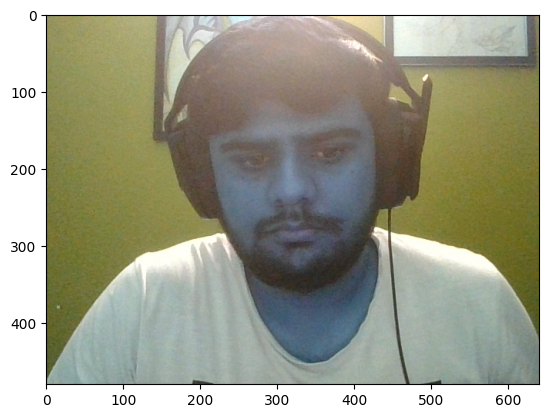

In [55]:
img = cv2.imread(os.path.join("E:\\Github\\Deep-Learning\\VideoTagger[WIP]\\data\\train\\images", "b2aedb8f-2f03-11ee-97bc-d8bbc1768911.jpg"))
plt.imshow(img)

In [62]:
with open(os.path.join(TRAIN_PATH, 'labels', 'b2aedb8f-2f03-11ee-97bc-d8bbc1768911.json'), 'r') as f:
    j = json.load(f)

x_1 = int(j['shapes'][0]['points'][0][0])
y_1 = int(j['shapes'][0]['points'][0][1])
x_2 = int(j['shapes'][0]['points'][1][0])
y_2 = int(j['shapes'][0]['points'][1][1])

In [88]:
coords = [0,0,0,0]
coords[0] = j['shapes'][0]['points'][0][0]
coords[1] = j['shapes'][0]['points'][0][1]
coords[2] = j['shapes'][0]['points'][1][0]
coords[3] = j['shapes'][0]['points'][1][1]

coords = np.divide(coords, [640, 480, 640, 480])
coords.shape

(4,)

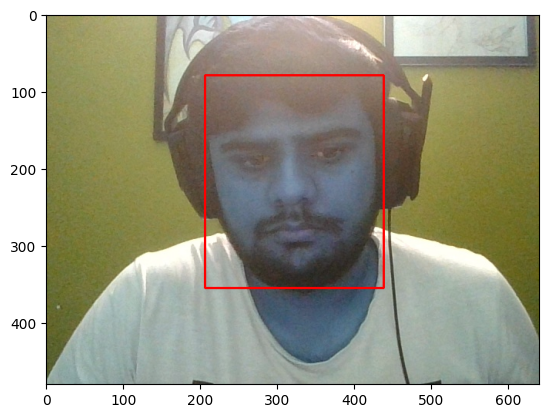

In [67]:
rect = cv2.rectangle(img, (x_1, y_1), (x_2, y_2), (255, 0 ,0), 2)
plt.imshow(rect)

In [87]:
album = augmentor(image=img, bboxes=[coords], class_labels=["face"])

In [118]:
album['bboxes'][0][2:].astype(int)

AttributeError: 'tuple' object has no attribute 'astype'

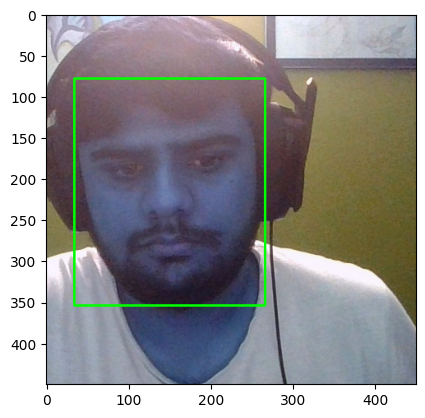

In [122]:
aug_img = cv2.rectangle(album['image'], tuple(np.multiply(album['bboxes'][0][:2], [450, 450]).astype(int)), 
              tuple(np.multiply(album['bboxes'][0][2:], [450, 450]).astype(int)), (0,255,0), 2)

plt.imshow(aug_img)